In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


This file is meant to loop over all of the files in a given list and draw the crystal arrangements of the outliers / any other specified plots

In [2]:
#import a bunch of useful functions for this analysis
from evwTools import *

In [3]:
#Names of the files to loop over

fileNamesPartial = ["gm2offline_ana_12653990_16369.00449.root",
            "gm2offline_ana_12653991_16369.00045.root",
            "gm2offline_ana_12653992_16367.00444.root",
            "gm2offline_ana_12653993_16358.00045.root",
            "gm2offline_ana_12653994_16355.00098.root",
            "gm2offline_ana_12653995_16369.00495.root",
            "gm2offline_ana_12653996_16369.00129.root",
            "gm2offline_ana_12653997_16356.00472.root",
            "gm2offline_ana_12653998_16370.00100.root",
            "gm2offline_ana_12653999_16368.00142.root",
            "gm2offline_ana_12654000_16358.00108.root",
            "gm2offline_ana_12654001_16362.00028.root",
            "gm2offline_ana_12654002_16370.00193.root",
            "gm2offline_ana_12654003_16364.00096.root",
            "gm2offline_ana_12654004_16367.00414.root",
            "gm2offline_ana_12654005_16367.00137.root",
            "gm2offline_ana_12654006_16357.00150.root",
            "gm2offline_ana_12654007_16357.00046.root",
            "gm2offline_ana_12654008_16370.00438.root",
            "gm2offline_ana_12654009_16364.00339.root",
            "gm2offline_ana_12654010_16358.00008.root",
            "gm2offline_ana_12654011_16368.00282.root",
            "gm2offline_ana_12654012_16363.00212.root",
            "gm2offline_ana_12654013_16369.00099.root",
            "gm2offline_ana_12654014_16367.00496.root",
            "gm2offline_ana_12654015_16362.00160.root",
            "gm2offline_ana_12654016_16363.00311.root",
            "gm2offline_ana_12654017_16368.00107.root",
            "gm2offline_ana_12654018_16356.00104.root",
            "gm2offline_ana_12654019_16370.00040.root",
            "gm2offline_ana_12654020_16363.00374.root",
            "gm2offline_ana_12654021_16370.00393.root",
            "gm2offline_ana_12654022_16359.00111.root",
            "gm2offline_ana_12654023_16369.00492.root",
            "gm2offline_ana_12654024_16359.00065.root",
            "gm2offline_ana_12654025_16358.00375.root",
            "gm2offline_ana_12654026_16363.00094.root",
            "gm2offline_ana_12654027_16367.00093.root",
            "gm2offline_ana_12654028_16370.00218.root",
            "gm2offline_ana_12654029_16368.00396.root",
            "gm2offline_ana_12654030_16365.00141.root",
            "gm2offline_ana_12654031_16356.00210.root",
            "gm2offline_ana_12654032_16367.00251.root",
            "gm2offline_ana_12654034_16364.00077.root",
            "gm2offline_ana_12654035_16363.00257.root",
            "gm2offline_ana_12654036_16367.00005.root",
            "gm2offline_ana_12654037_16367.00128.root",
            "gm2offline_ana_12654038_16365.00367.root",
            "gm2offline_ana_12654039_16358.00025.root",
            "gm2offline_ana_12654040_16363.00479.root",
            "gm2offline_ana_12654041_16369.00155.root",
            "gm2offline_ana_12654042_16368.00421.root",
            "gm2offline_ana_12654043_16356.00252.root",
            "gm2offline_ana_12654044_16358.00237.root",
            "gm2offline_ana_12654045_16355.00136.root",
            "gm2offline_ana_12654046_16358.00053.root"]

#and their paths.
fileNames = ["./data/dataExternal/Oct23DataSet/" + x for x in fileNamesPartial]

#uncomment this to just loop over the local file for which we also have the island data
#fileNames = ["./data/gm2offline_ana.root"]

In [4]:
#this will be the cut that will determine whether or not something is printed. Written in root format, not pyroot.
condition = "TMath::Abs(deltaT - timeCorr) > 10 && timeEast > 30*1000/1.25" 

#this will be a ttree variable printed on the canvas along with the unique ID. First entry is text, second is what should be 
#     evaluated by the ttree. Newline is there for formatting.
whatsInteresting = ('\n deltaT = ',"(entry.deltaT - entry.timeCorr)") 

Starting file: ./data/dataExternal/Oct23DataSet/gm2offline_ana_12653990_16369.00449.root
     Matching entries in this file: 4
     Unique island:  1636800214000550002400155
     deltaE:  42.95614326480267
          Found another island with this unique ID. Adding their crystals together:
                [36.0, 37.0, 38.0, 45.0, 46.0, 47.0]
                [36.0, 37.0, 38.0, 45.0, 46.0, 47.0, 36.0, 37.0, 38.0, 45.0, 46.0, 47.0]
          Found Match ( 0 0 1 )
              East:  [36.0, 37.0, 38.0, 45.0, 46.0, 47.0, 36.0, 37.0, 38.0, 45.0, 46.0, 47.0]
              West:  [11.0]


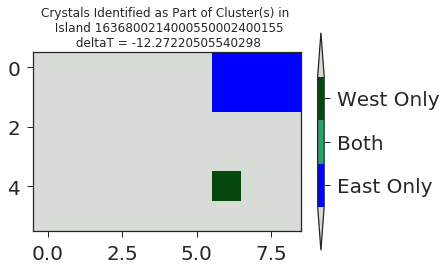

     Unique island:  1636700453001590002000158
     deltaE:  187.88126620047655
          Found another island with this unique ID. Adding their crystals together:
                [15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0]
                [15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0]
          Found Match ( 1 0 1 )
              East:  [15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0, 15.0, 16.0, 17.0, 24.0, 25.0, 26.0, 33.0, 34.0, 35.0]
              West:  [53.0]


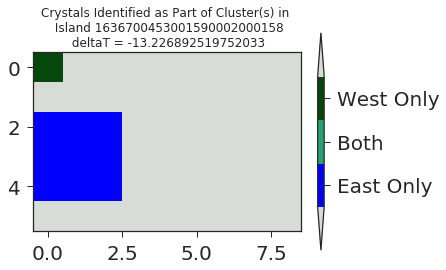

     Unique island:  1635900063000170000700160
     deltaE:  36.86444902796242
          Found another island with this unique ID. Adding their crystals together:
                [7.0, 8.0, 16.0, 17.0]
                [7.0, 8.0, 16.0, 17.0, 7.0, 8.0, 16.0, 17.0]
          Found Match ( 2 0 1 )
              East:  [7.0, 8.0, 16.0, 17.0, 7.0, 8.0, 16.0, 17.0]
              West:  [52.0]


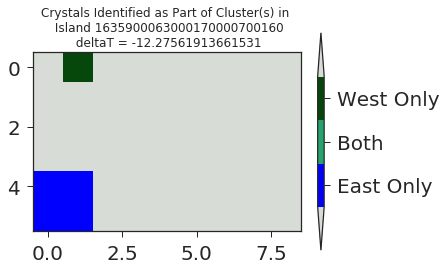

     Unique island:  1636800081000110002400208
     deltaE:  69.30231722494676
          Found another island with this unique ID. Adding their crystals together:
                [28.0, 29.0, 30.0, 37.0, 38.0, 39.0, 46.0, 47.0, 48.0]
                [28.0, 29.0, 30.0, 37.0, 38.0, 39.0, 46.0, 47.0, 48.0, 28.0, 29.0, 30.0, 37.0, 38.0, 39.0, 46.0, 47.0, 48.0]
          Found Match ( 3 0 1 )
              East:  [28.0, 29.0, 30.0, 37.0, 38.0, 39.0, 46.0, 47.0, 48.0, 28.0, 29.0, 30.0, 37.0, 38.0, 39.0, 46.0, 47.0, 48.0]
              West:  [11.0]


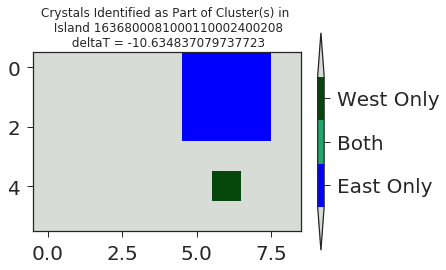

Max Number of Islands Reached ( 3 ). Stopping execution at end of previous file.


In [5]:
matchingUniqueIDs = []
breakpoint = 3


for fileName in fileNames:
    
    if(len(matchingUniqueIDs) > breakpoint):
        print("Max Number of Islands Reached (", breakpoint,"). Stopping execution at end of previous file.")
        break
    
    try:
        f = r.TFile(fileName)
        twest = f.Get("farline").Get("eventTree")
        teast = f.Get("farline").Get("eastTree")
        tcomp = f.Get("farline").Get("evwTree")
        terr = f.Get("farline").Get("evwNoPartnerTree")
        tcomp2 = f.Get("farline").Get("wveTree")
        terr2 = f.Get("farline").Get("wveNoPartnerTree")
    except:
        print("ERROR: File ", fileName, "not found")
        continue
        
    print("Starting file:", fileName)
    
    dingbefore = 0

    fout = r.TFile("temp_tree_storage.root","recreate")
    tcomp_partial = tcomp.CopyTree(condition)
    print("     Matching entries in this file:", tcomp_partial.GetEntries())
    
    for i, entry in enumerate(tcomp_partial):
        counter = 0
        ding = constructUniqueID(entry)
        matchingUniqueIDs.append( ding )
        if (dingbefore == ding):
            continue

        print("     Unique island: ", ding)
        print("     deltaE: ", entry.deltaE)

        crystalsEast = [x for x in entry.crystalsEast]

        teast_partial = teast.CopyTree( constructConditionFromUniqueIDEast(ding) )
        for k, entry3 in enumerate(teast_partial):
            dong = constructUniqueIDeast(entry3)
            if ding == dong:
                print("          Found another island with this unique ID. Adding their crystals together:")
                print("               ",crystalsEast)
                crystalsEast += [x for x in entry3.crystalsEast]
                print("               ",crystalsEast)

        crystalsWest = []
        twest_partial = twest.CopyTree( constructConditionFromUniqueIDWest(ding) )
        for j, entry2 in enumerate(twest_partial):
            dong = constructUniqueIDwest(entry2)
            if (ding == dong):
                counter = counter + 1
                print("          Found Match (", i, j, counter,")")
                print("              East: ", crystalsEast)
                print("              West: ", [x for x in entry2.crystalsWest])
                crystalsWest += [x for x in entry2.crystalsWest]

        imshowCompare( toMap(crystalsEast), toMap(crystalsWest), True, True,
                      str(ding)+whatsInteresting[0]+str(eval(whatsInteresting[1])) )
        dingbefore = ding
        counter += 1
        if(counter > breakpoint):
            break

In [ ]:
print(condition,":", matchingUniqueIDs)